In [1]:
# Import and load

import keras
keras.__version__

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras.callbacks import ModelCheckpoint

import os

from sklearn.metrics import roc_auc_score 

import matplotlib.pyplot as plt 
%matplotlib inline

from matplotlib2tikz import save as tikz_save

n_unique_words = 10000 
max_review_length = 500

print('Loading data...')
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words) # removed n_words_to_skip
pad_type = trunc_type = 'pre'
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

print(len(x_train), 'training sequences')
print(len(x_valid), 'validation sequences')
print('x_train shape:', x_train.shape)
print('x_valid shape:', x_valid.shape)



Using TensorFlow backend.


Loading data...
(25000, 'training sequences')
(25000, 'validation sequences')
('x_train shape:', (25000, 500))
('x_valid shape:', (25000, 500))


In [2]:
# training:
epochs = 5
batch_size = 128

# vector-space embedding: 
n_dim = 32

# RNN layer architecture:
n_rnn = 32 
drop_rnn = 0.2

model1 = Sequential()
model1.add(layers.Embedding(n_unique_words, n_dim))
model1.add(layers.LSTM(n_rnn, dropout=drop_rnn, recurrent_dropout=0.2))
model1.add(layers.Dense(1, activation='sigmoid')) 

model2 = Sequential()
model2.add(layers.Embedding(n_unique_words, n_dim))
model2.add(layers.LSTM(2*n_rnn, dropout=drop_rnn, recurrent_dropout=0.2))
model2.add(layers.Dense(1, activation='sigmoid')) 

model3 = Sequential()
model3.add(layers.Embedding(n_unique_words, n_dim))
model3.add(layers.LSTM(n_rnn, dropout=drop_rnn, recurrent_dropout=0.2, return_sequences=True))
model3.add(layers.LSTM(n_rnn, dropout=drop_rnn, recurrent_dropout=0.2))
model3.add(layers.Dense(1, activation='sigmoid')) 

model4 = Sequential()
model4.add(layers.Embedding(n_unique_words, n_dim))
model4.add(layers.LSTM(2*n_rnn, dropout=drop_rnn, recurrent_dropout=0.2, return_sequences=True))
model4.add(layers.LSTM(2*n_rnn, dropout=drop_rnn, recurrent_dropout=0.2))
model4.add(layers.Dense(1, activation='sigmoid')) 

# output directory name:
models = [model1, model2, model3, model4]
outdirs =  ['model_output/lstm1',
            'model_output/lstm2',
            'model_output/lstm3',
            'model_output/lstm4']


In [14]:
def train_model(model, output_dir):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])
    return history

hists = []
for k in range(len(models)):
    hists.append(train_model(models[k], outdirs[k]))
    print('Training model {} complete'.format(k))
    

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 83s 3ms/step - loss: 0.5356 - acc: 0.7282 - val_loss: 0.3976 - val_acc: 0.8269
Epoch 2/5
25000/25000 [==============================] - 82s 3ms/step - loss: 0.3715 - acc: 0.8430 - val_loss: 0.3782 - val_acc: 0.8365
Epoch 3/5
25000/25000 [==============================] - 82s 3ms/step - loss: 0.3272 - acc: 0.8678 - val_loss: 0.3714 - val_acc: 0.8425
Epoch 4/5
25000/25000 [==============================] - 82s 3ms/step - loss: 0.4884 - acc: 0.8262 - val_loss: 0.4123 - val_acc: 0.8173
Epoch 5/5
25000/25000 [==============================] - 84s 3ms/step - loss: 0.3204 - acc: 0.8718 - val_loss: 0.3933 - val_acc: 0.8286
Training model 0 complete
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 124s 5ms/step - loss: 0.5229 - acc: 0.7389 - val_loss: 0.3884 - val_acc: 0.8315
Epoch 2/5
25000/25000 [==============================] - 

In [3]:
fig1 = plt.figure(1)
plt.clf()
fig2 = plt.figure(2)
plt.clf()

for k in range(len(models)):
    
    history = hists[k]

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))
    
    plt.figure(1)
    plt.subplot(2, 2, k+1)
    plt.title('Model {}'.format(k+1))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.ylim([0.5, 1])
    #plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure(2)
    plt.subplot(2, 2, k+1)
    plt.title('Model {}'.format(k+1))
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    #plt.title('Training and validation loss')
    plt.ylim([0, 1])
    plt.legend()

tikz_save("../beamer/graphics/LSTM_acc.tex",
             figureheight="//figureheight",
             figurewidth="//figurewidth",
             figure=fig1)
    
plt.show()

NameError: name 'hists' is not defined

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [4]:
y_hats = []
points = ['2', '3', '3', '5']
for k in range(len(models)):
    models[k].load_weights(outdirs[k]+"/weights.0"+points[k]+".hdf5") # zero-indexed
    y_hats.append(models[k].predict_proba(x_valid))
    print("Model {}: {:0.2f}".format(k+1, roc_auc_score(y_valid, y_hats[k])*100.0))
    

Model 1: 91.40
Model 2: 91.75
Model 3: 90.09
Model 4: 92.40


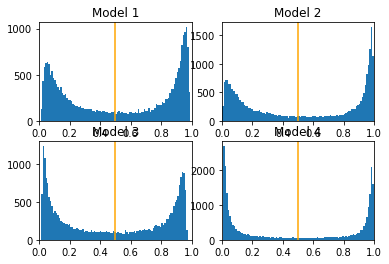

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label tex

In [6]:
fig3 = plt.figure(3)
plt.clf()
for k in range(len(models)):
    plt.subplot(2, 2, k+1)
    plt.title('Model {}'.format(k+1))
    plt.hist(y_hats[k], bins=100)
    _ = plt.axvline(x=0.5, color='orange')
    plt.xlim([0, 1])
    
plt.show()
    
tikz_save("../beamer/graphics/LSTM_hists.tex",
             figureheight="\\figureheight",
             figurewidth="\\figurewidth",
             figure=fig3)